# Running LazyPredict with subsets of inpout data based on time delta

In [1]:
# import get_lazy_regresor()
import importlib.util
import sys

def import_function_from_path(file_path, function_name):
    # Load the module from the file path
    spec = importlib.util.spec_from_file_location("module_name", file_path)
    module = importlib.util.module_from_spec(spec)
    sys.modules["module_name"] = module
    spec.loader.exec_module(module)
    
    # Retrieve the function from the loaded module
    func = getattr(module, function_name)
    return func

PATH_TO_SCRIPT = '/Users/masaver/Desktop/masaver/data_science_projects/sep24_bds_int_medical/notebooks/helpers/LazyPredict.py'
function_name = 'get_lazy_regressor'

get_lazy_regressor = import_function_from_path( PATH_TO_SCRIPT , function_name )

PATH_TO_SRC = '/Users/masaver/Desktop/masaver/data_science_projects/sep24_bds_int_medical'
sys.path.append( PATH_TO_SRC )

# Load other requiered libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

# Mute warnings
import warnings
warnings.filterwarnings("ignore")

# Import the preprocessign pipeline
from pipelines import *



In [2]:
# Read and display the train and test data
data_file = os.path.join('..','..', '..' , '..', 'data', 'raw', 'train.csv')
df_train = pd.read_csv(data_file, index_col = 0 , parse_dates = True )
display( df_train.head() )

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.60,NaN,NaN,9.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.40
p01_1,p01,06:25:00,NaN,NaN,9.70,NaN,NaN,9.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.80
p01_2,p01,06:40:00,NaN,NaN,9.20,NaN,NaN,8.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.50
p01_3,p01,06:55:00,NaN,NaN,8.70,NaN,NaN,8.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.80
p01_4,p01,07:10:00,NaN,NaN,8.40,NaN,NaN,8.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.70


Data Preprocessing.

Main steps:
* Re-Encoding of the **time** stamp into **day-phase**
* Drop the following collumns: **activity**, **carbs**, **steps** , **p_num** & **time**
* The NAs in the remaining columns are imputed with interpolation and median 
* Two negative values for insuling are set to 0
* The column **day-phase** is re-encoded with pd.get_dummies()
* Finally, all columns are transformed with a StandardScaler.

In [3]:
# Split the data into Features and Target variables, 
# and Standarize the features with the preprocessing pipelines
X = df_train.drop( 'bg+1:00' , axis = 1 )
y = df_train['bg+1:00']

# Train Test Split
x_train,x_test,y_train,y_test = train_test_split( X , y , test_size=0.2 , random_state=17 )
data_pipe = pipeline_s
x_train_s = data_pipe.fit_transform( x_train )
x_test_s = data_pipe.transform( x_test )

display( x_train_s )
display( x_test_s )


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
id,,,,,,,,,,,,,,,,,,,,,
p11_1931,1.07,1.07,1.04,1.07,1.01,0.91,0.81,0.74,0.81,0.84,...,-0.34,-0.34,-0.34,-0.34,-0.34,-0.34,-0.34,-0.29,-0.34,-0.34
p10_9422,-0.89,-0.89,-0.82,-0.79,-0.69,-0.73,-0.79,-0.79,-0.79,-0.89,...,0.01,-0.24,-0.21,-0.26,-0.24,-0.19,0.15,-0.11,-0.26,0.06
p06_8273,0.07,0.07,0.07,-0.03,-0.13,-0.23,-0.31,-0.40,-0.49,-0.55,...,3.15,3.64,1.51,0.09,-0.01,0.72,3.56,3.88,3.62,1.48
p12_17133,-0.46,-0.49,-0.46,-0.46,-0.46,-0.49,-0.49,-0.49,-0.46,-0.46,...,4.14,4.58,4.89,4.47,4.43,4.66,4.47,3.89,4.03,4.04
p03_2346,-0.66,-0.66,-0.63,-0.66,-0.63,-0.73,-0.76,-0.76,-0.76,-0.79,...,-0.37,-0.34,-0.37,-0.39,-0.37,-0.37,-0.02,0.35,-0.34,-0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p02_17172,-0.16,-0.16,-0.16,-0.16,-0.26,-0.33,-0.39,-0.43,-0.46,-0.49,...,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85
p10_23964,0.84,0.90,0.97,0.97,0.91,0.84,0.74,0.54,0.37,0.24,...,0.58,0.72,1.17,-0.22,-0.13,0.23,-0.13,1.42,2.25,-0.03
p03_7966,1.90,1.87,1.80,1.67,1.57,1.41,1.24,1.14,1.01,0.87,...,-0.37,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
id,,,,,,,,,,,,,,,,,,,,,
p11_17351,0.80,0.80,0.67,0.71,0.84,1.01,1.17,1.47,1.54,1.54,...,-0.34,-0.34,-0.34,-0.34,-0.34,-0.34,-0.34,-0.34,-0.34,-0.34
p10_15385,-0.82,-0.79,-0.82,-0.79,-0.83,-0.79,-0.79,-0.79,-0.69,-0.66,...,-0.35,-0.35,-0.35,-0.35,-0.35,-0.35,-0.32,-0.35,-0.35,-0.35
p06_2496,-1.09,-1.09,-1.09,-1.07,-1.05,-1.02,-1.03,-1.02,-1.02,-0.97,...,0.81,0.93,1.72,1.41,1.13,1.47,0.71,0.37,0.45,-0.28
p10_8410,-0.63,-0.59,-0.59,-0.56,-0.53,-0.53,-0.56,-0.63,-0.72,-0.83,...,2.69,3.64,3.11,1.09,3.29,3.74,3.64,3.70,4.00,3.92
p02_2562,0.44,0.41,0.34,0.31,0.31,0.27,0.24,0.24,0.21,0.21,...,-0.69,-0.69,-0.69,-0.69,-0.69,-0.54,-0.89,-0.41,-0.27,-0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p02_24761,0.90,0.34,0.01,-0.16,-0.33,-0.59,-0.79,-0.92,-0.96,-0.99,...,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31
p10_22597,-0.69,-0.86,-0.99,-1.06,-0.86,-0.82,-0.76,-0.96,-0.96,-0.96,...,-0.26,-0.35,-0.35,-0.35,-0.34,0.34,0.02,0.07,1.04,0.14
p03_2231,0.67,0.41,0.57,0.64,0.61,0.81,1.01,0.91,0.71,0.67,...,-0.39,-0.13,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39


In [4]:
# Display descriptive statistics
display( x_train_s.describe() )
display( x_test_s.describe() )

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
count,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00,...,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00,141619.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.02,-2.02,-2.02,-2.02,-2.02,-2.02,-2.02,-2.02,-2.02,-2.03,...,-1.13,-1.13,-1.13,-1.13,-1.13,-1.13,-1.13,-1.13,-1.14,-1.14
25%,-0.72,-0.72,-0.73,-0.73,-0.73,-0.73,-0.73,-0.73,-0.72,-0.73,...,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39
50%,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,...,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31
75%,0.54,0.54,0.54,0.54,0.54,0.54,0.54,0.54,0.54,0.54,...,-0.11,-0.10,-0.11,-0.11,-0.11,-0.10,-0.10,-0.11,-0.10,-0.10
max,6.49,6.49,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.51,...,14.37,14.40,14.40,14.38,14.38,14.41,14.40,14.39,11.85,14.48


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
count,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00,...,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00,35405.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.99,1.00,1.00,1.00,1.00,1.01,1.01,1.01,1.02,1.02
min,-2.02,-2.02,-2.02,-2.02,-2.02,-2.02,-2.02,-2.02,-2.02,-2.03,...,-1.13,-1.13,-1.13,-1.13,-1.13,-1.13,-1.13,-1.13,-1.14,-1.14
25%,-0.72,-0.72,-0.73,-0.73,-0.73,-0.73,-0.73,-0.73,-0.72,-0.73,...,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39,-0.39
50%,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,...,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31
75%,0.54,0.54,0.54,0.54,0.54,0.54,0.54,0.54,0.54,0.54,...,-0.10,-0.10,-0.09,-0.10,-0.10,-0.10,-0.11,-0.10,-0.10,-0.10
max,6.49,6.49,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.51,...,13.31,12.96,13.34,13.77,10.43,13.80,13.78,11.81,14.44,13.41


In [ ]:
def subset_data( df , delta ):

    tmp_l = []
    metrics = ['bg','insulin','hr','cals']
    for metric in metrics:
        start_col= f'{metric}{delta}'
        end_col = f'{metric}-0:00'
        tmp_l.append( df.loc[ : , start_col:end_col ])
        
    return pd.concat( tmp_l , axis = 1 )

def run_lp( delta ): 

    # Extract a given time delta from the data
    xtrain = subset_data( x_train_s , delta )
    xtest = subset_data( x_test_s , delta )

    # Run a Lazy Regressor
    reg = get_lazy_regressor( exclude = ['SVR','QuantileRegressor'] )
    models, _ = reg.fit( xtrain , xtest , y_train , y_test )

    # Update the models table
    models['delta'] = delta
    models = models[['delta','RMSE']]
    models.reset_index( inplace=True )

    return models

In [6]:
# # Ruunn LP at different deltas 
# res_l = []
# deltas = [
#         '-0:00','-0:05','-0:10','-0:15','-0:20','-0:25','-0:30','-0:35','-0:40','-0:45','-0:50','-0:55',
#         '-1:00','-1:05','-1:10','-1:15','-1:20','-1:25','-1:30','-1:35','-1:40','-1:45','-1:50','-1:55',
#         '-2:00','-2:05','-2:10','-2:15','-2:20','-2:25','-2:30','-2:35','-2:40','-2:45','-2:50','-2:55',
#         '-3:00','-3:05','-3:10','-3:15','-3:20','-3:25','-3:30','-3:35','-3:40','-3:45','-3:50','-3:55',
#         '-4:00','-4:05','-4:10','-4:15','-4:20','-4:25','-4:30','-4:35','-4:40','-4:45','-4:50','-4:55',
#         '-5:00','-5:05','-5:10','-5:15','-5:20','-5:25','-5:30','-5:35','-5:40','-5:45','-5:50','-5:55'
#     ]

# for delta in deltas:
#     print(f'Calculating LP for delta {delta} ... ')
#     tmp = run_lp( delta )
#     res_l.append( tmp )
#     clear_output( wait=True )

# res_df = pd.concat( res_l )
# res_df.to_csv( 'LP_res_delta_curve.csv' )

res_df = pd.read_csv( 'LP_res_delta_curve.csv' )

Plot RMSE scores based  on time delta

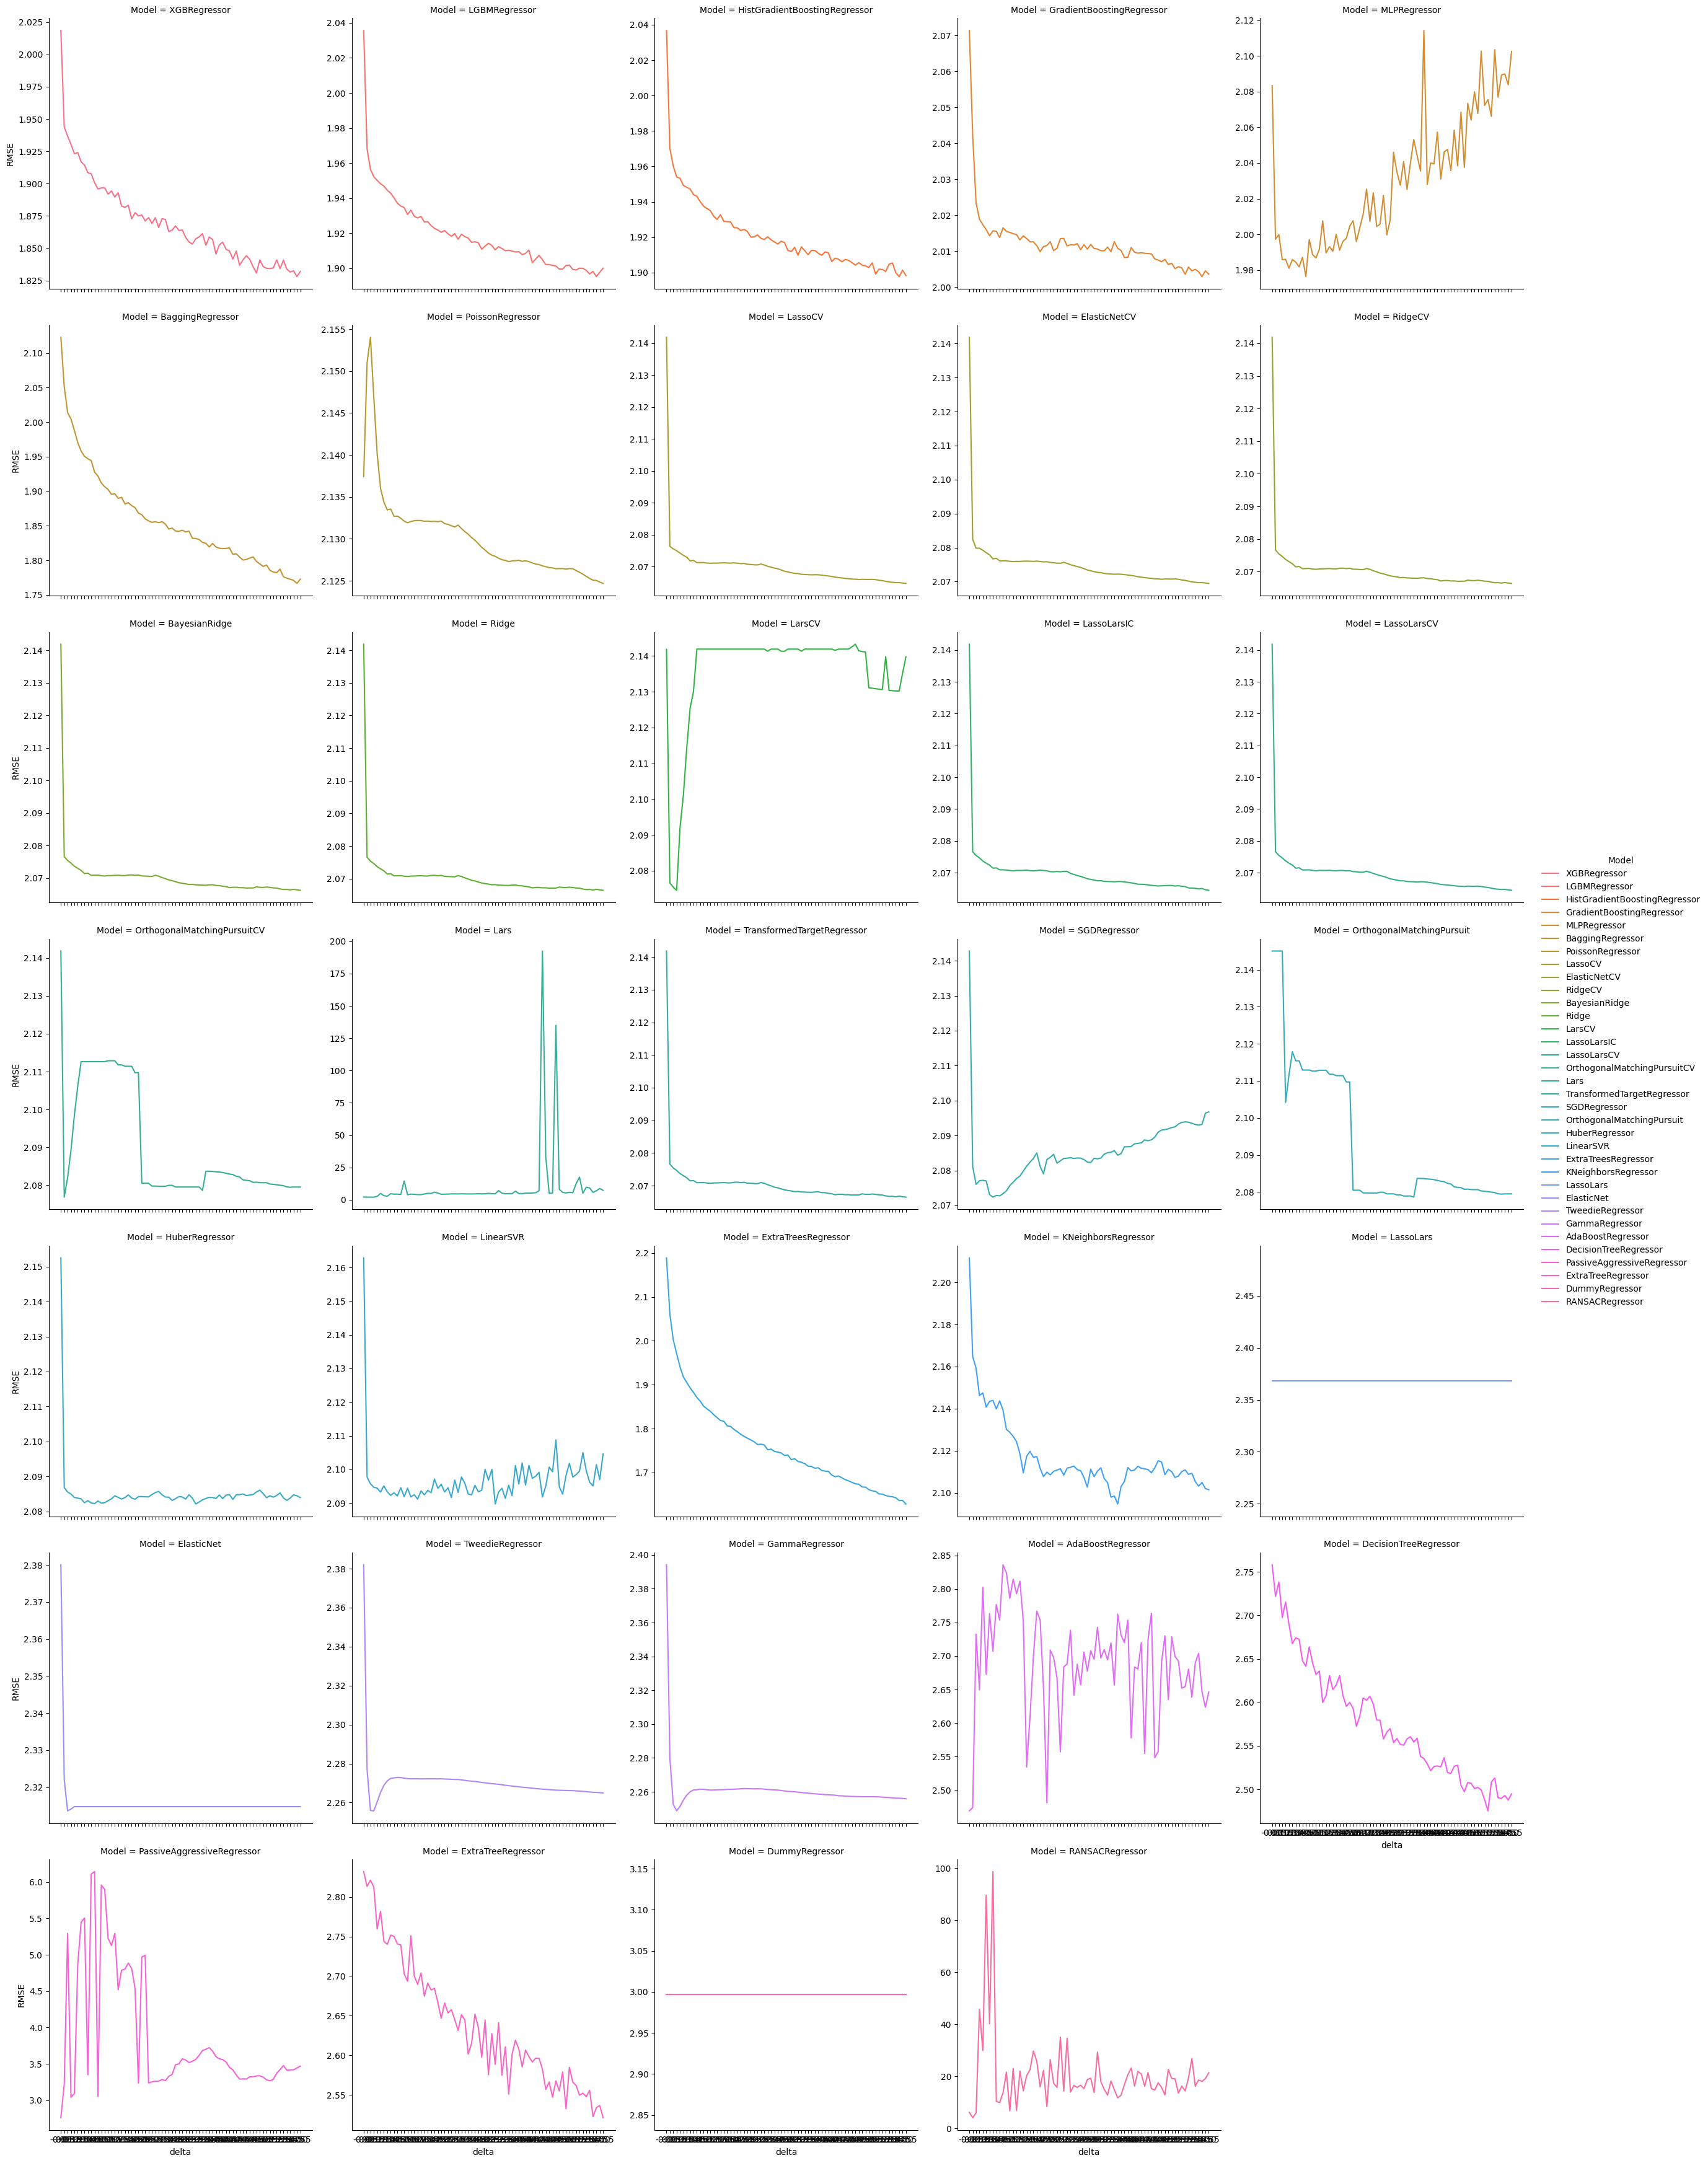

In [9]:
import seaborn as sns
sns.relplot(
    data = res_df , 
    x = 'delta' , 
    y = 'RMSE' ,
    kind = 'line' ,
    hue = 'Model' , 
    col = 'Model' , 
    col_wrap = 5 , 
    facet_kws={'sharey':False}
)

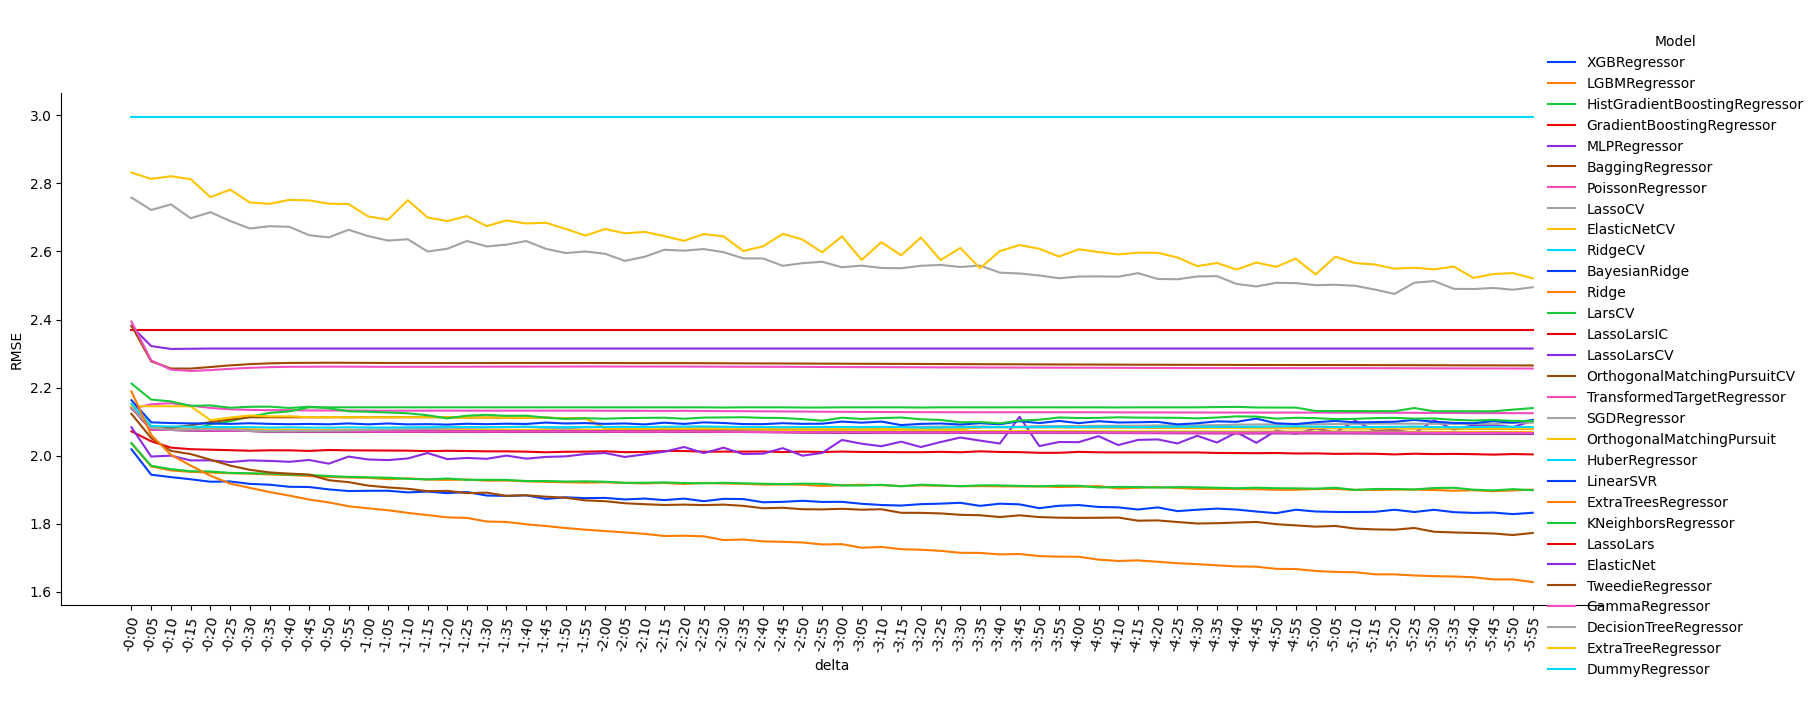

In [10]:
exclude_list = ['Lars','RANSACRegressor','AdaBoostRegressor','PassiveAggressiveRegressor']
dfs = res_df[ ~res_df["Model"].isin(exclude_list)]

g = sns.relplot(
    data = dfs , 
    x = 'delta' , 
    y = 'RMSE' ,
    kind = 'line' ,
    hue = 'Model' ,
    palette='bright'
)

g.fig.set_size_inches(18,6)
g.set_xticklabels(rotation=80)
g.add_legend(bbox_to_anchor=(1.1, 1.1))

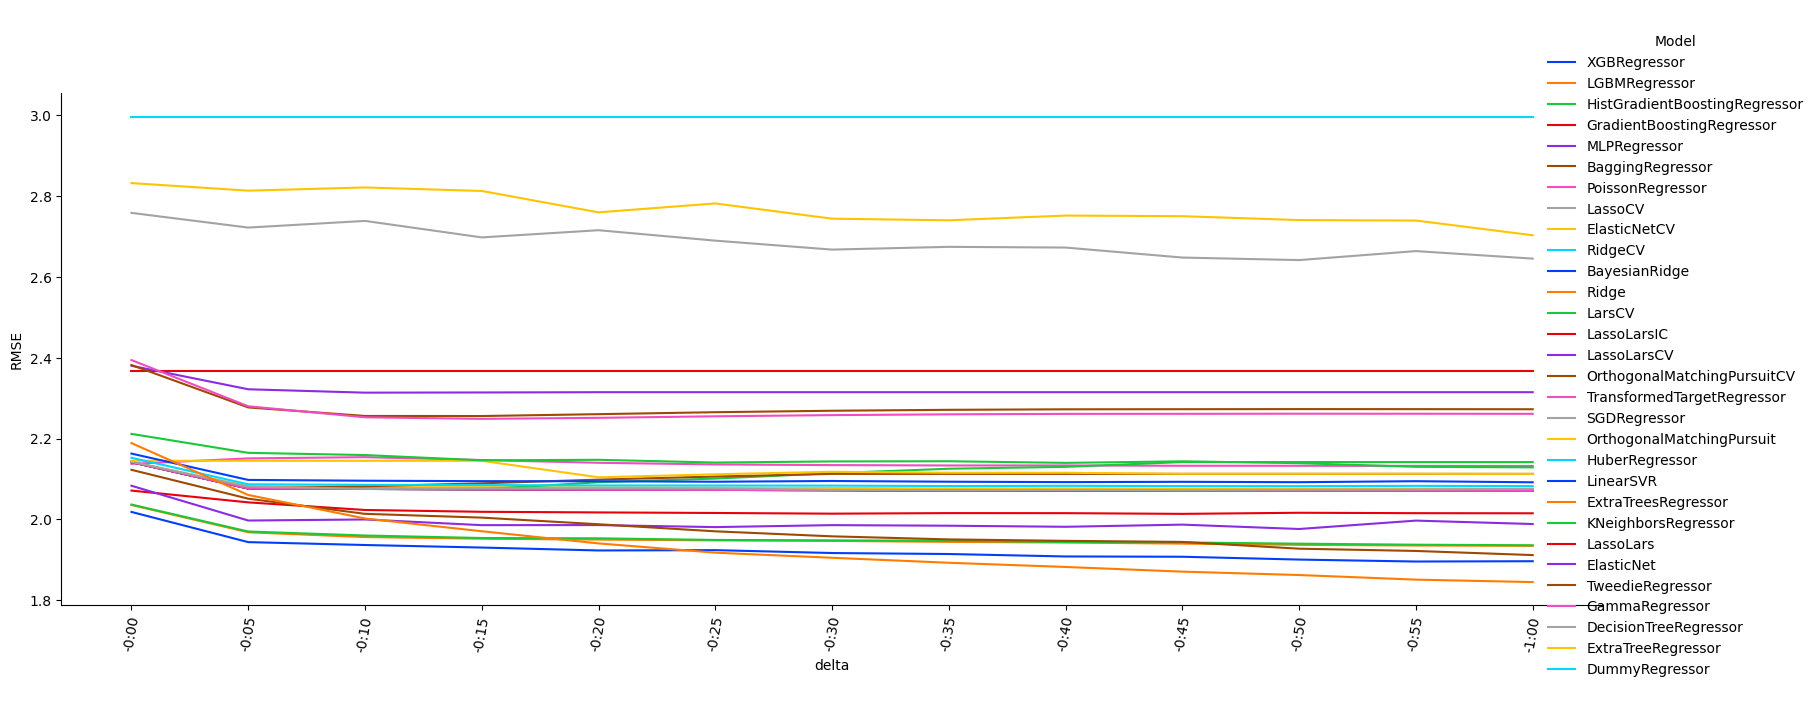

In [11]:
subset_cols = ['-0:00','-0:05','-0:10','-0:15','-0:20','-0:25','-0:30','-0:35','-0:40','-0:45','-0:50','-0:55','-1:00']
exclude_list = ['Lars','RANSACRegressor','AdaBoostRegressor','PassiveAggressiveRegressor']

dfs = res_df[ ~res_df["Model"].isin( exclude_list ) ]
dfs = dfs[ dfs["delta"].isin( subset_cols ) ]

g = sns.relplot(
    data = dfs , 
    x = 'delta' , 
    y = 'RMSE' ,
    kind = 'line' ,
    hue = 'Model' ,
    palette='bright'
)

g.fig.set_size_inches(18,6)
g.set_xticklabels(rotation=80)
g.add_legend(bbox_to_anchor=(1.1, 1.1))

Summary
* The previous plots suggest that  for most models tested, there is little ( to no ) benefit in including lag features larger than '-1:00'